In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import gsw
import xarray as xr
from matplotlib import pyplot as plt

In [2]:
def get_nutricline(crit, nprof, z):
    # use linear interpolation to find depth of nutricline based on critical value
    # first sort the profile so it is descending with depth
    
    znut = np.interp(crit, nprof, z)
    return znut

### Different types of profile files

* R and BR: real-time profile data, available within 12-24 hours, onlt automated QC tests have been performed, includes PARAM_QC. May also include PARAM_ADJUSTED if scientific calibration applied in real time.
* D and BD: delayed-mode adjusted data, includes PARAM_ADJUSTED and PARAM_ADJUSTED_QC variables.
* SR and SD: synthetic profiles (R: real-time; D: delayed-mode) generated to align CTD and BGC parameters.

**QC flags to exclude**: 3, potentially correctable bad data; 4, bad data.

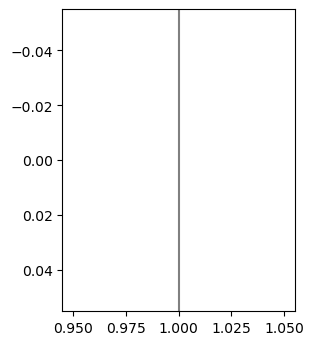

In [68]:
# import argo float data

infile = '../data/argo/2902754/profiles/BR2902754_020.nc'
data = xr.open_dataset(infile)

znut = get_nutricline(1.0, data.NITRATE_ADJUSTED[1,:], data.PRES[1,:])

cm = plt.get_cmap('viridis', 4)

fig = plt.figure(figsize = (3,4), dpi = 100)
plt.plot(data.NITRATE_ADJUSTED[1,:], data.PRES[1,:]);
plt.axvline(1, color = 'grey')
plt.plot(1.0, znut, 'ro')
plt.gca().invert_yaxis()
plt.show()

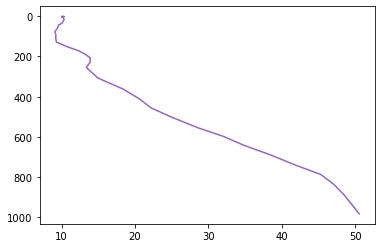

In [69]:
for n in range(5):
    plt.plot(data.NITRATE[n,:], data.PRES[n,:])
plt.gca().invert_yaxis()
plt.show()